In [3]:
import nazca as nd

Starting layout export...
...gds generation
...Wrote file './nazca_export.gds'


/Users/harryxwh2003/opt/anaconda3/envs/NazcaEnv/lib/python3.13/site-packages/nazca/layout.py:489: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.layer2color[row[0]].append(dict(cfg.colors.iloc[i]))


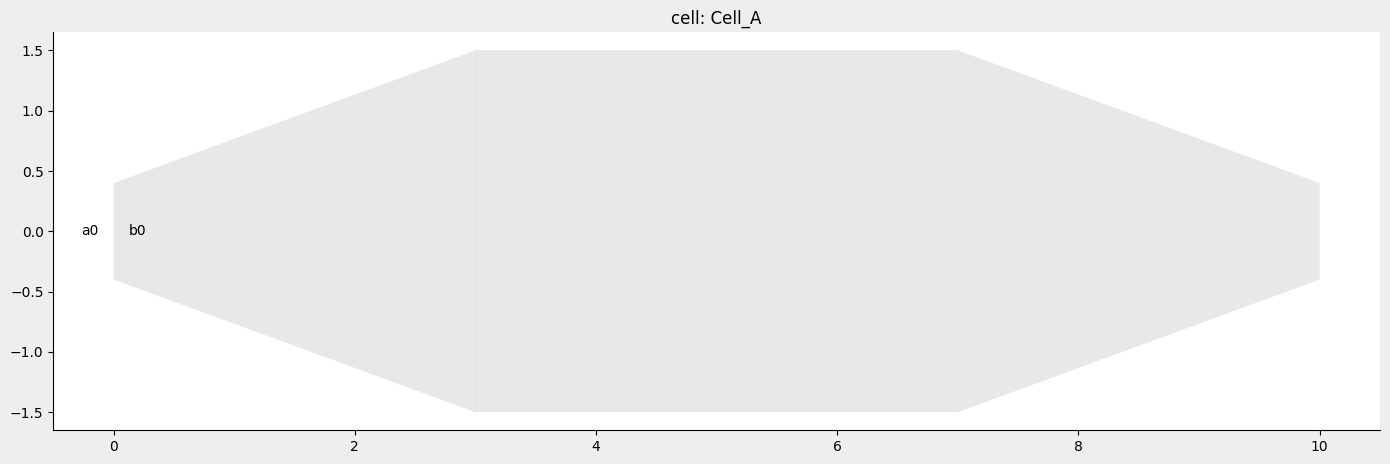

In [11]:
import nazca as nd

with nd.Cell(name='Cell_A') as cella:
    nd.taper(length=3, width1=0.8, width2=3).put()
    nd.strt(length=4,width=3).put()
    nd.taper(length=3, width1=3, width2=0.8).put()


nd.export_gds(cella)
nd.export_plt(cella)